In [19]:
import numpy as np
import sklearn as skl
import pandas as pd

from numpy import asarray
from numpy import save

from matplotlib import pyplot


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [20]:
StartingData = pd.read_csv('data/train.csv', index_col='id')

In [21]:
dataClean1 = StartingData.dropna()


dataClean2 = dataClean1.drop('user_address', axis=1)

dataClean2['exchange_a_volatility'].value_counts()
exAdict = {
    'very low' : 0,
    'low' : 1,
    'medium' : 2,
    'high' : 3,
    'very high' : 4
}
dataClean2['ex_a_vol_num'] = dataClean2['exchange_a_volatility'].apply(lambda x: exAdict[x])

dataClean3 = dataClean2.drop(['exchange_a_volatility', 'anonymous'], axis=1)


#df_1['isProf'] = df_1[['exchange_a_price', 'exchange_b_price']].apply(lambda x: int(x[0] > x[1]), axis=1)
dataClean3['Profit'] = dataClean3[['exchange_a_price', 'exchange_b_price']].apply(lambda x: x[0] - x[1], axis=1)
#dataClean3['Anon'] = dataClean2['anonymous'].apply(lambda x: int(x[1:]))

#dataClean1.info()

df1= dataClean3.copy()

robustscaler = RobustScaler()
prof = df1[['Profit']]
robustscaler.fit(prof)
df1['Profit'] = robustscaler.transform(prof)
    
bal_c = df1[['user_balance_coin_a']]
robustscaler.fit(bal_c)
df1['user_balance_coin_a'] = robustscaler.transform(bal_c)
    
    
bal_u = df1[['user_balance_usd']]
robustscaler.fit(bal_u)
df1['user_balance_usd'] = robustscaler.transform(bal_u)
    
    
normalizer = Normalizer(norm='l2')
# save numerical columns to normalize
X = df1[['exchange_a_price', 'exchange_b_price']]

    # fit transformer to data
normalizer.fit(X)
X_normalized = normalizer.transform(X)
df1['exchange_a_price'] = X_normalized[:, 0]
df1['exchange_b_price'] = X_normalized[:, 1]


dataClean3=df1.copy()

train, test = train_test_split(dataClean3, stratify=dataClean3['result'], test_size=0.2)




In [22]:
dataClean3

,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_b_volatility,result,ex_a_vol_num,Profit
id,,,,,,,,,,
8,0.599503,-0.608946,0,0,0.706630,0.707583,0.000367,0,4,-0.593536
12,-0.715302,-0.064080,0,0,0.706164,0.708048,0.000695,0,1,-0.700246
28,-0.821768,2.307249,0,0,0.706589,0.707624,0.000431,0,0,-0.398732
50,-1.076770,1.697545,0,0,0.706281,0.707931,0.000456,0,1,-0.705167
78,-0.393040,-0.176604,0,0,0.707225,0.706989,0.000188,0,1,-0.007086
...,...,...,...,...,...,...,...,...,...,...
3988935,0.301414,-0.023663,0,0,0.707991,0.706221,0.000158,0,1,0.734983
3988947,-0.854274,-0.024140,0,0,0.707200,0.707013,0.000435,0,2,-0.062274
3988948,-0.284247,-0.238408,0,0,0.196266,0.980551,0.000452,0,1,-1497.266866


In [23]:
ytrain = train['result']
xtrain = train.drop('result', axis=1)

ytest = test['result']
xtest = test.drop('result', axis=1)

Majority class
Precision: 0.95
Rcall: 0.99
F1-Score: 0.97
Minority class
Precision: 0.66
Recall: 0.34
F1-Score: 0.45
[[9.99602060e-01 3.97940075e-04]
 [8.86931818e-01 1.13068182e-01]
 [9.45170560e-01 5.48294404e-02]
 ...
 [8.56871575e-01 1.43128425e-01]
 [9.69231532e-01 3.07684679e-02]
 [7.55831195e-01 2.44168805e-01]]
The AUROC of our classifier is = 0.892
The accuracy of our classifier is = 0.942


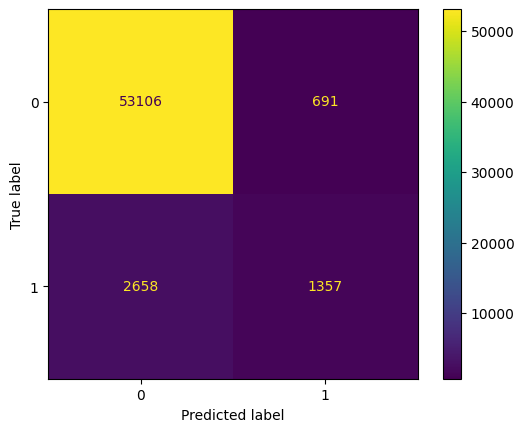

In [24]:
lr_base_clf =RandomForestClassifier(criterion = 'gini', n_estimators=80 ,max_depth =25,random_state=42)

lr_base_clf.fit(xtrain, ytrain)

y_pred = lr_base_clf.predict(xtest)

print("Majority class")
print("Precision: %.2f" % precision_score(ytest, y_pred, pos_label=0))
print("Rcall: %.2f" % recall_score(ytest, y_pred, pos_label=0))
print("F1-Score: %.2f" % f1_score(ytest, y_pred, pos_label=0))
print("==============")

print("Minority class")
print("Precision: %.2f" % precision_score(ytest, y_pred, pos_label=1))
print("Recall: %.2f" % recall_score(ytest, y_pred, pos_label=1))
print("F1-Score: %.2f" % f1_score(ytest, y_pred, pos_label=1))

cm = confusion_matrix(ytest, y_pred, labels=lr_base_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=lr_base_clf.classes_)
disp.plot();


predicted_proba = lr_base_clf.predict_proba(xtest)
print(predicted_proba)

roc_auc = roc_auc_score(y_score=predicted_proba[:,1], y_true=ytest)
print('The AUROC of our classifier is = %.3f' % roc_auc)

accuracy = accuracy_score(y_pred=y_pred, y_true=ytest)
print('The accuracy of our classifier is = %.3f' % accuracy)

In [17]:
a = StartingData['exchange_a_volatility'].mode()[0]
b = dataClean3['exchange_b_volatility'].median()
c = dataClean3['exchange_a_price'].median()
d = dataClean3['exchange_b_price'].median()
print(a,b,c,d)
#dataClean3['ex_a_vol_num'].value_counts()

low 0.00037491496343965 0.70727368836267 0.706939834603953


In [18]:
XTEST = pd.read_csv('data/test.csv', index_col='id')
XTEST.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112830 entries, 3988978 to 5307806
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   user_address                      112830 non-null  object 
 1   user_balance_usd                  112830 non-null  float64
 2   user_balance_coin_a               112830 non-null  float64
 3   user_historical_transactions_10s  112830 non-null  int64  
 4   user_historical_transactions_30s  112830 non-null  int64  
 5   exchange_a_price                  103453 non-null  float64
 6   exchange_b_price                  112830 non-null  float64
 7   exchange_a_volatility             107728 non-null  object 
 8   exchange_b_volatility             110036 non-null  float64
 9   anonymous                         112830 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 9.5+ MB


In [44]:
tdataClean1 = XTEST


tdataClean2 = tdataClean1.drop('user_address', axis=1)

tdataClean2['exchange_a_volatility'].value_counts()
exAdict = {
    'very low' : 0,
    'low' : 1,
    'medium' : 2,
    'high' : 3,
    'very high' : 4
}

exAdict2 = {
    0 : 'very low',
    1 : 'low',
    2 : 'medium',
    3 : 'high',
    4 : 'very high'
}

tdataClean2['exchange_a_volatility'] = tdataClean2['exchange_a_volatility'].fillna(a)
tdataClean2['exchange_b_volatility'] = tdataClean2['exchange_b_volatility'].fillna(b)
tdataClean2['exchange_a_price'] = tdataClean2['exchange_a_price'].fillna(c)
tdataClean2['exchange_b_price'] = tdataClean2['exchange_b_price'].fillna(d)

#tdataClean2['ex_a_vol_num'] = tdataClean2['exchange_a_volatility'].apply(lambda x:  exAdict[x])

tdataClean3 = tdataClean2.drop(['exchange_a_volatility', 'anonymous'], axis=1)
tdataClean1.info()
#df_1['isProf'] = df_1[['exchange_a_price', 'exchange_b_price']].apply(lambda x: int(x[0] > x[1]), axis=1)
tdataClean3['Profit'] = tdataClean3[['exchange_a_price', 'exchange_b_price']].apply(lambda x: x[0] - x[1], axis=1)
#tdataClean3['Anon'] = tdataClean2['anonymous'].apply(lambda x: int(x[1:]))

df1= dataClean3.copy()

robustscaler = RobustScaler()
prof = df1[['Profit']]
robustscaler.fit(prof)
df1['Profit'] = robustscaler.transform(prof)
    
bal_c = df1[['user_balance_coin_a']]
robustscaler.fit(bal_c)
df1['user_balance_coin_a'] = robustscaler.transform(bal_c)
    
    
bal_u = df1[['user_balance_usd']]
robustscaler.fit(bal_u)
df1['user_balance_usd'] = robustscaler.transform(bal_u)
    
    
normalizer = Normalizer(norm='l2')
# save numerical columns to normalize
X = df1[['exchange_a_price', 'exchange_b_price']]

    # fit transformer to data
normalizer.fit(X)
X_normalized = normalizer.transform(X)
df1['exchange_a_price'] = X_normalized[:, 0]
df1['exchange_b_price'] = X_normalized[:, 1]




#dataClean1.info()
tdataClean3 = df1.copy()


#train, test = train_test_split(tdataClean3, stratify=tdataClean3['result'], test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112830 entries, 3988978 to 5307806
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   user_address                      112830 non-null  object 
 1   user_balance_usd                  112830 non-null  float64
 2   user_balance_coin_a               112830 non-null  float64
 3   user_historical_transactions_10s  112830 non-null  int64  
 4   user_historical_transactions_30s  112830 non-null  int64  
 5   exchange_a_price                  103453 non-null  float64
 6   exchange_b_price                  112830 non-null  float64
 7   exchange_a_volatility             107728 non-null  object 
 8   exchange_b_volatility             110036 non-null  float64
 9   anonymous                         112830 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 9.5+ MB


In [45]:
tdataClean3

,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_b_volatility,result,Profit,profit
id,,,,,,,,,,
8,0.599503,-0.608946,0,0,0.706630,0.707583,0.000367,0,-0.089979,-0.593536
12,-0.715302,-0.064080,0,0,0.706164,0.708048,0.000695,0,-0.110526,-0.700246
28,-0.821768,2.307249,0,0,0.706589,0.707624,0.000431,0,-0.052469,-0.398732
50,-1.076770,1.697545,0,0,0.706281,0.707931,0.000456,0,-0.111473,-0.705167
78,-0.393040,-0.176604,0,0,0.707225,0.706989,0.000188,0,0.022942,-0.007086
...,...,...,...,...,...,...,...,...,...,...
3988935,0.301414,-0.023663,0,0,0.707991,0.706221,0.000158,0,0.165826,0.734983
3988947,-0.854274,-0.024140,0,0,0.707200,0.707013,0.000435,0,0.012315,-0.062274
3988948,-0.284247,-0.238408,0,0,0.196266,0.980551,0.000452,0,-288.272833,-1497.266866


In [46]:
predicted_proba = lr_base_clf.predict_proba(tdataClean3)
res = pd.DataFrame(index=tdataClean3.index, data=predicted_proba[:,1])
res['result'] = res[0]
res = res.drop(0, axis=1)

res.to_csv(r'PleaseBeGood.csv', index = True)

/home/francisco/.virtualenvs/slu01/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- result

  warnings.warn(message, FutureWarning)


ValueError: X has 10 features, but RandomForestClassifier is expecting 9 features as input.

In [ ]:
dataClean1 = StartingData.dropna()

dataClean1 = pd.DataFrame(dataClean1)

dataClean1['Anon1'] = dataClean1['anonymous'].apply(lambda x: x[0])

dataClean1['Anon2'] = dataClean1['anonymous'].apply(lambda x: int(x[1:]))

dataClean1.info()

rel = pd.crosstab(index=dataClean1["Anon1"], 
                           columns=dataClean1["result"])
#print(dataClean1[dataClean1['result'] == 1])
print(rel)


rel = pd.crosstab(index=dataClean1["Anon1"], 
                           columns=dataClean1["result"])
#print(dataClean1[dataClean1['result'] == 1])
print(rel)

#for column in dataClean1.columns:
#    print(column)
#    print(dataClean1[column].corr(dataClean1['result']))